In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


## Metrics 
from sklearn.metrics import roc_curve, roc_auc_score, auc, accuracy_score, recall_score, f1_score, precision_score,roc_curve, auc, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve, train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  StandardScaler

## For ML Models:
from sklearn.linear_model import LogisticRegression,LinearRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import random


In [33]:
df = pd.read_csv('cleaned.csv')

In [34]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=42)

In [35]:
y_test

21781    0
16129    1
12830    0
20940    1
18392    1
        ..
27097    0
6161     1
28543    0
3388     0
3310     1
Name: loan_status, Length: 8592, dtype: int64

In [36]:
print(f'X Test Shape: {X_test.shape}')
print(f'y Test Shape: {y_test.shape}')
print(f'X Train Shape: {X_train.shape}')
print(f'y Train Shape: {y_train.shape}')


X Test Shape: (8592, 11)
y Test Shape: (8592,)
X Train Shape: (20046, 11)
y Train Shape: (20046,)


## Creating the Pipeline will require:
* Preprocessing numerical features:
    1. StandardScaler - To balance scale among features 
*
* Applying SMOTE to handle imbalance in our Target variable

## Function for Model Results

In [37]:
def results(model, X, y):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred, labels = model.classes_)
    disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
    print(f'Accuracy Score: {accuracy_score(y,y_pred)}')
    print(f'Precision Score: {precision_score(y,y_pred)}')
    print(f'Recall Score: {recall_score(y,y_pred)}')
    print(f'F1 Score: {f1_score(y,y_pred)}')
    disp.plot()

    #ROC Curve
    if hasattr(model, 'decision_function'):
        if hasattr(model, 'predict_log_proba'):
            # For RandomForestClassifier
            scores = model.predict_log_proba(X)[:, 1]
        else:
            # For SVM
            scores = model.decision_function(X)

        # Plot ROC curve
        fpr, tpr, threshold = roc_curve(y, scores)
        roc_auc = auc(fpr, tpr)
        plt.figure()
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc='lower right')
        plt.show()
        # Obtain decision score


In [38]:
numericals = list(X.select_dtypes(['float64','int64']).columns)
numericals

['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length']

In [39]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(),numericals),],remainder= 'passthrough')

# LinearRegression|

In [40]:
lr = Pipeline([('preprocessor', preprocessor), ('SMOTE', SMOTE()), ('classifier', LinearRegression())])

In [41]:
lr.fit(X_train,y_train)
print("model score: %.3f" % lr.score(X_test, y_test))

model score: 0.081


### Linear Regression performs poorly with a model score of only 0.079, which suggests that linear regression is not suitable for this classification task. Linear regression is more suitable for regression tasks where the target variable is continuous.

# LogisticRegression 

In [42]:
logreg = Pipeline([('preprocessor', preprocessor), ('SMOTE', SMOTE()), ('classifier', LogisticRegression())])

In [43]:
logreg.fit(X_train,y_train)
print("model score: %.3f" % logreg.score(X_test, y_test))

model score: 0.781


Accuracy Score: 0.7853437094682231
Precision Score: 0.5017151379567487
Recall Score: 0.7776236708275543
F1 Score: 0.6099175052125827


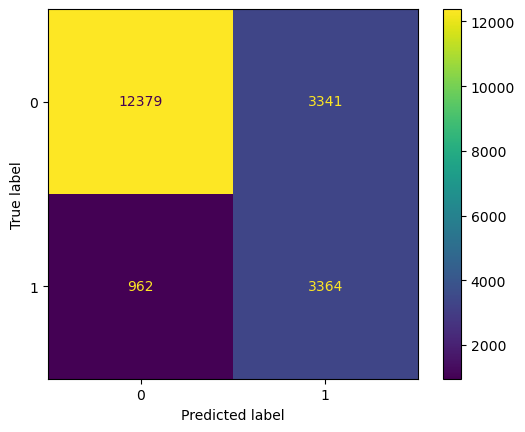

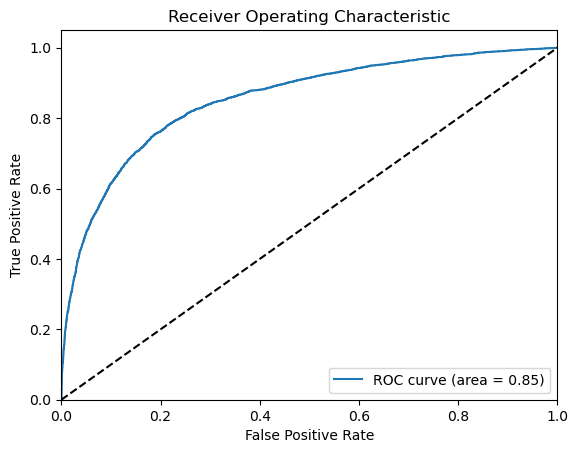

In [44]:
results(logreg,X_train, y_train)

Accuracy Score: 0.7806098696461825
Precision Score: 0.4986004198740378
Recall Score: 0.7591901971230687
F1 Score: 0.6019007391763463


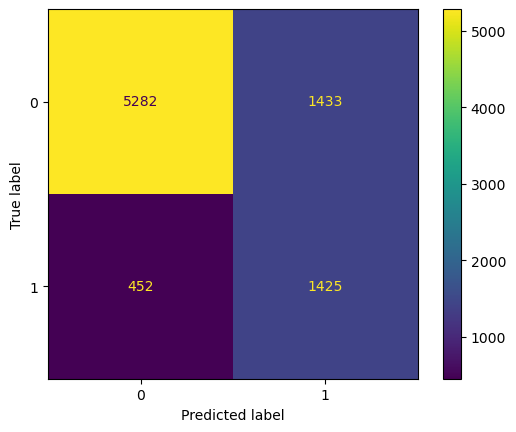

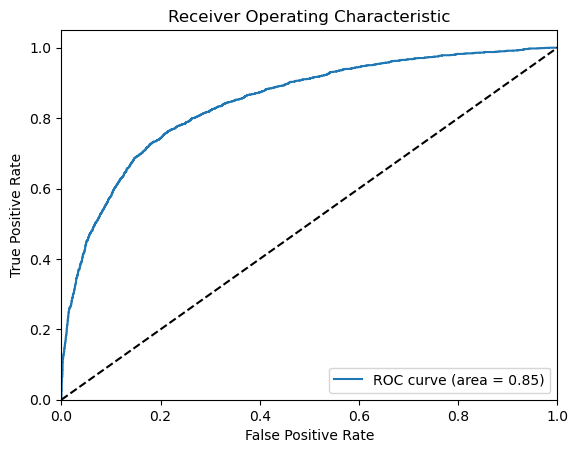

In [45]:
results(logreg,X_test, y_test)

Accuracy Score: 0.7806098696461825
Precision Score: 0.4986004198740378
Recall Score: 0.7591901971230687
F1 Score: 0.6019007391763463


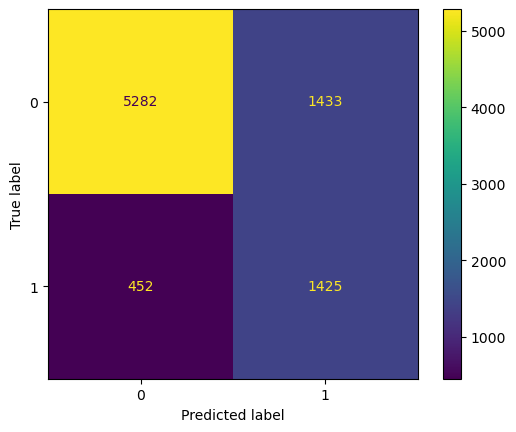

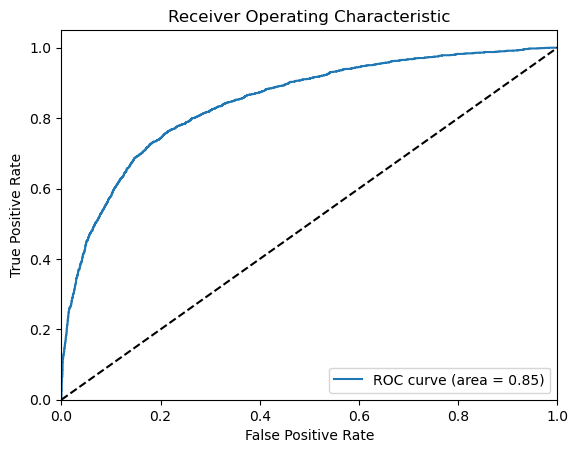

In [46]:
results(logreg,X_test, y_test)

In [47]:
logreg_params = {'classifier__max_iter':[100,1000, 10000],
                 'classifier__solver':['liblinear', 'lbfgs','newton-cg']}

In [48]:
logreg_grid = GridSearchCV(logreg, logreg_params)
logreg_grid.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['person_age',
                                                                          'person_income',
                                                                          'person_home_ownership',
                                                                          'person_emp_length',
                                                                          'loan_intent',
                                                                          'loan_grade',
                                                                          'loan_amnt',
                                                                          'loan_int_rate',
                                                                          'loan_percent_income',
                                                                          'cb_person_default_on_file',
                                                                          'cb_person_cred_hist_length'])])),
                                       ('SMOTE', SMOTE()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__max_iter': [100, 1000, 10000],
                         'classifier__solver': ['liblinear', 'lbfgs',
                                                'newton-cg']})

In [49]:
logreg_grid.best_params_

{'classifier__max_iter': 100, 'classifier__solver': 'newton-cg'}

In [50]:
logreg_grid.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_home_ownership',
                                                   'person_emp_length',
                                                   'loan_intent', 'loan_grade',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_default_on_file',
                                                   'cb_person_cred_hist_length'])])),
                ('SMOTE', SMOTE()),
                ('classifier', LogisticRegression(solver='newton-cg'))])

In [51]:
best_logreg = logreg_grid.best_estimator_

Accuracy Score: 0.7851940536765439
Precision Score: 0.5014970059880239
Recall Score: 0.7743874248728617
F1 Score: 0.6087588588042885


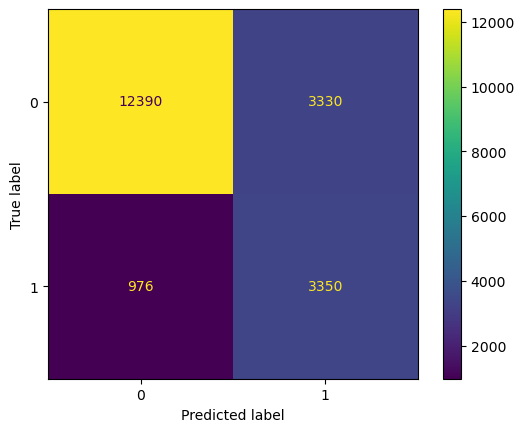

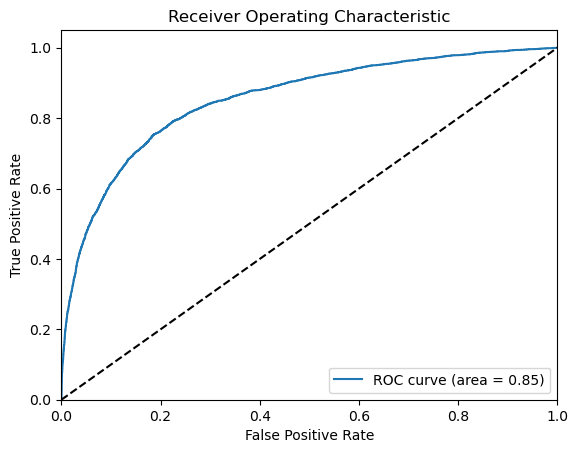

In [52]:
results(best_logreg,X_train,y_train)

Accuracy Score: 0.7807262569832403
Precision Score: 0.4987714987714988
Recall Score: 0.757059136920618
F1 Score: 0.6013542107490478


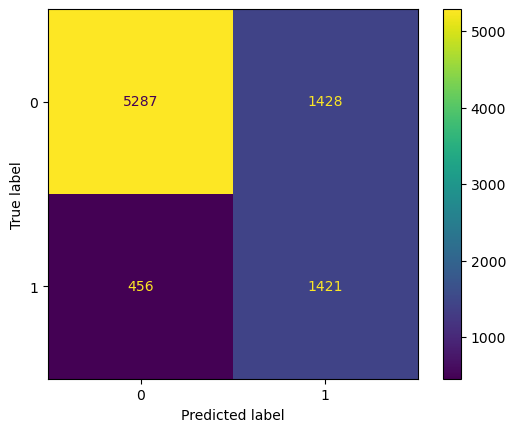

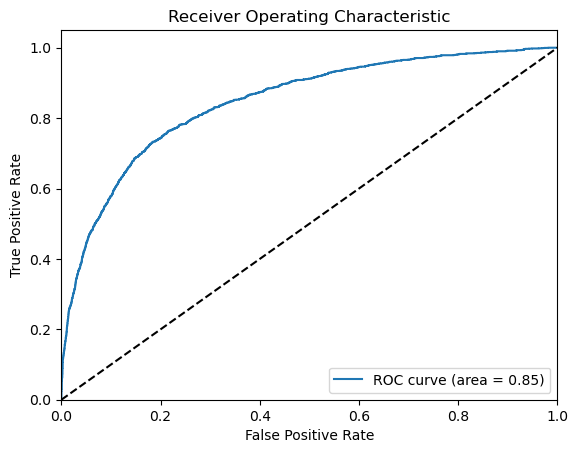

In [53]:
results(best_logreg, X_test, y_test)

These evaluation metrics suggest that the logistic regression model performs reasonably well in predicting loan status, but precision indicates that theres still room for improvement

# RidgeClassifier

In [54]:
rr = Pipeline([('preprocessor', preprocessor), ('SMOTE', SMOTE()), ('classifier', RidgeClassifier())])

In [55]:
rr.fit(X_train,y_train)
print("model score: %.3f" % rr.score(X_test, y_test))

model score: 0.786


Accuracy Score: 0.7908310884964581
Precision Score: 0.5102197633317965
Recall Score: 0.7674526121128062
F1 Score: 0.6129419366749745


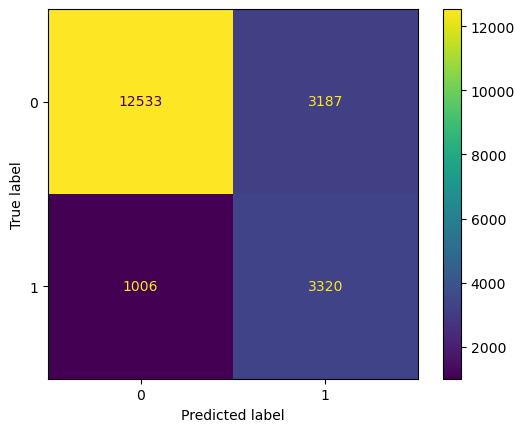

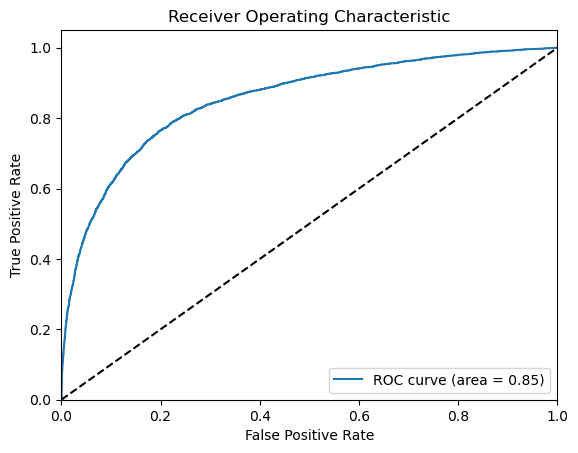

In [56]:
results(rr,X_train,y_train)

Accuracy Score: 0.785963687150838
Precision Score: 0.5068296189791517
Recall Score: 0.7511987213638786
F1 Score: 0.6052801030264006


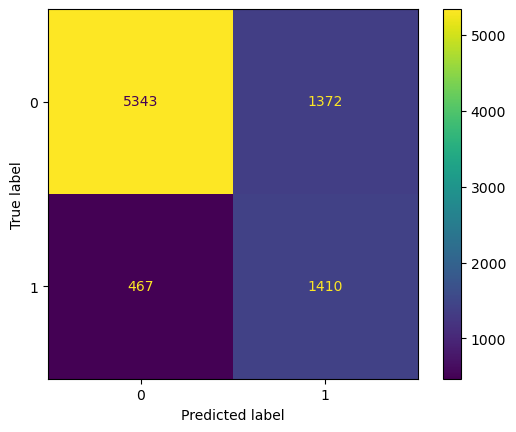

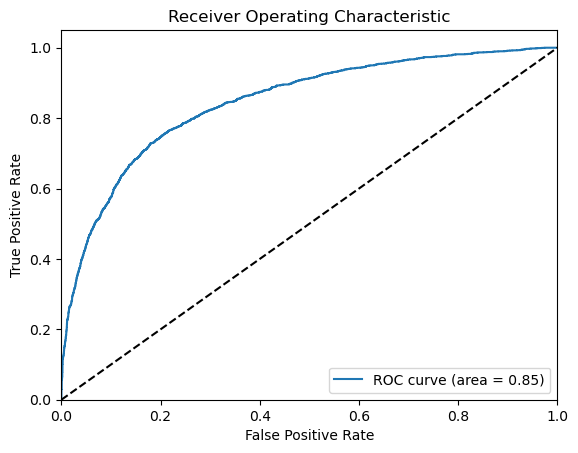

In [57]:
results(rr,X_test,y_test)

In [58]:
rr_params = {
    'classifier__alpha': [0.1, 1.0, 10.0],
    'classifier__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg'],
    'classifier__max_iter': [1000, 5000, 10000]
}

In [59]:
rr_grid = GridSearchCV(rr, rr_params, cv=5)
rr_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['person_age',
                                                                          'person_income',
                                                                          'person_home_ownership',
                                                                          'person_emp_length',
                                                                          'loan_intent',
                                                                          'loan_grade',
                                                                          'loan_amnt',
                                                                          'loan_int_rate',
                                                                          'loan_percent_income',
                                                                          'cb_person_default_on_file',
                                                                          'cb_person_cred_hist_length'])])),
                                       ('SMOTE', SMOTE()),
                                       ('classifier', RidgeClassifier())]),
             param_grid={'classifier__alpha': [0.1, 1.0, 10.0],
                         'classifier__max_iter': [1000, 5000, 10000],
                         'classifier__solver': ['auto', 'svd', 'cholesky',
                                                'lsqr', 'sparse_cg']})

In [60]:
best_rr = rr_grid.best_estimator_

Accuracy Score: 0.7892846453157737
Precision Score: 0.5077743902439025
Recall Score: 0.7699953767914933
F1 Score: 0.6119786882234063


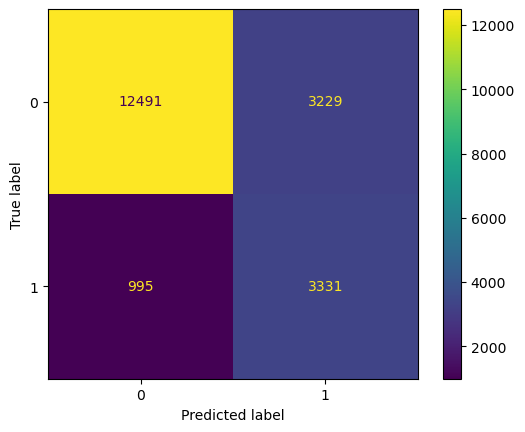

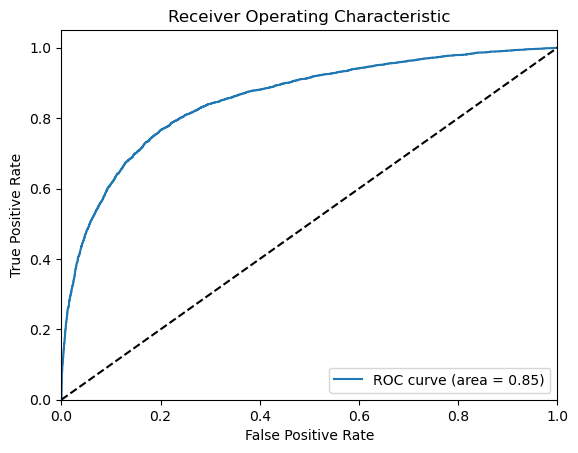

In [61]:
results(best_rr,X_train,y_train)

Accuracy Score: 0.7847998137802608
Precision Score: 0.505
Recall Score: 0.7533297815663292
F1 Score: 0.6046611075475732


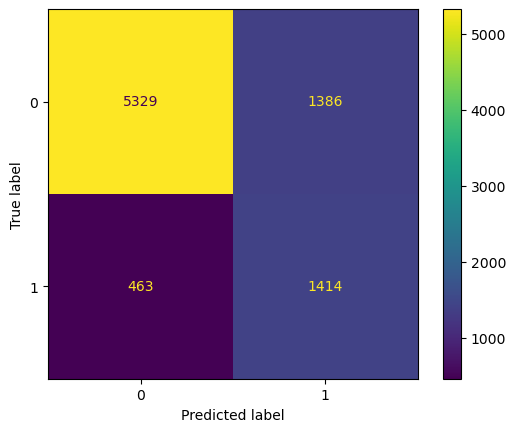

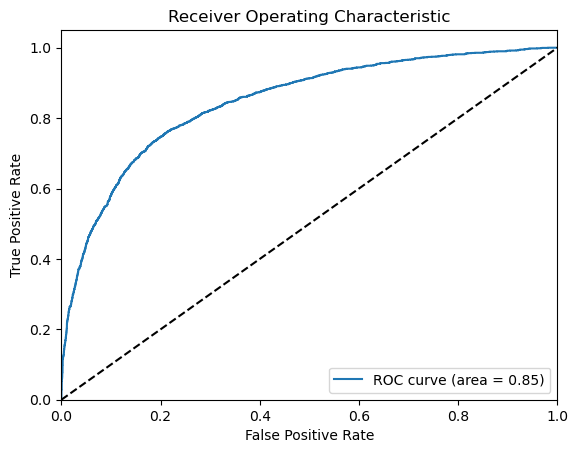

In [62]:
results(best_rr, X_test, y_test)

### Ridge Classifier outperforms Logistic Regression in terms of accuracy and F1 score on both the training and test sets. However, the differences in performance between the two models are relatively small.

# Random Forest 

In [63]:
rf = Pipeline([('preprocessor', preprocessor), ('SMOTE', SMOTE()), ('classifier', RandomForestClassifier())])

In [64]:
rf.fit(X_train,y_train)
print("RandomForest Classifier score: %.3f" % rf.score(X_test, y_test))

RandomForest Classifier score: 0.924


Accuracy Score: 1.0
Precision Score: 1.0
Recall Score: 1.0
F1 Score: 1.0


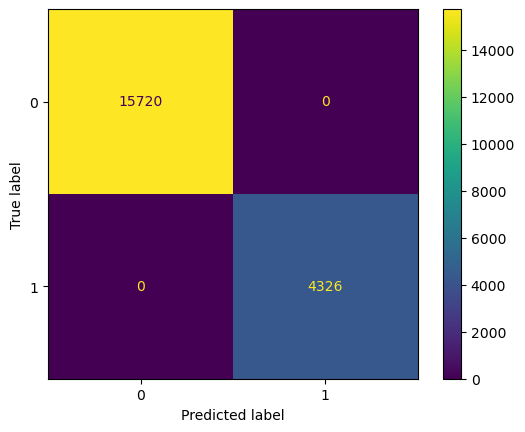

In [65]:
results(rf,X_train,y_train)

Accuracy Score: 0.9243482309124768
Precision Score: 0.918200408997955
Recall Score: 0.7176345231752796
F1 Score: 0.8056220095693779


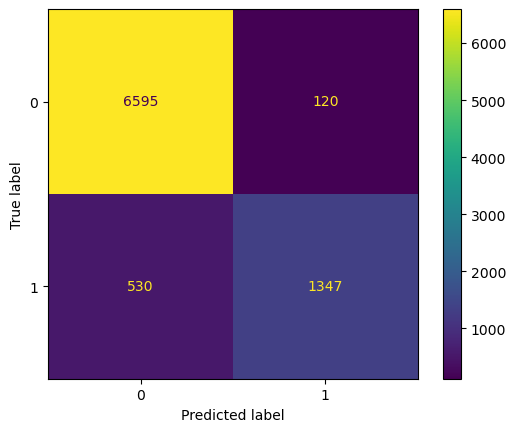

In [66]:
results(rf,X_test,y_test)

In [67]:
rf_params =  {'classifier__criterion': ['gini', 'entropy'], 
               'classifier__max_depth':[15,20],
               'classifier__n_estimators':[50,100],
               'classifier__max_depth':[10,20,30],
               'classifier__min_samples_split': [10,15,20],
               'classifier__min_samples_leaf':[5,10]
             
             }

In [68]:
rf_grid = GridSearchCV(rf,rf_params,cv=5)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['person_age',
                                                                          'person_income',
                                                                          'person_home_ownership',
                                                                          'person_emp_length',
                                                                          'loan_intent',
                                                                          'loan_grade',
                                                                          'loan_amnt',
                                                                          'loan_int_rate',
                                                                          'loan_percent_income',
                                                                          'cb_person_default_on_file',
                                                                          'cb_person_cred_hist_length'])])),
                                       ('SMOTE', SMOTE()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [10, 20, 30],
                         'classifier__min_samples_leaf': [5, 10],
                         'classifier__min_samples_split': [10, 15, 20],
                         'classifier__n_estimators': [50, 100]})

In [69]:
best_rf_grid = rf_grid.best_estimator_
best_rf_grid.fit(X_train,y_train)
print("RandomForest Classifier Grid score: %.3f" % best_rf_grid.score(X_test, y_test))

RandomForest Classifier Grid score: 0.921


Accuracy Score: 0.9668262995111244
Precision Score: 0.9856725921995224
Recall Score: 0.8587609801202034
F1 Score: 0.9178505250154416


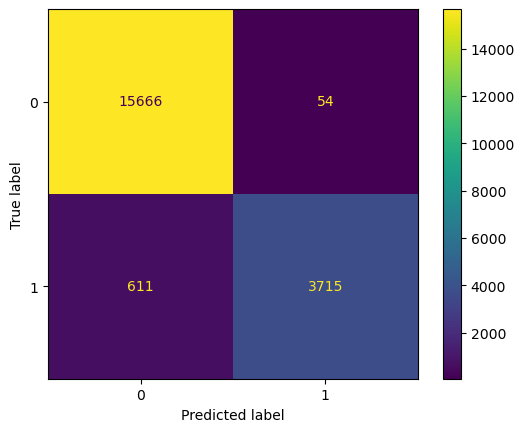

In [70]:
results(best_rf_grid,X_train,y_train)

Accuracy Score: 0.9213221601489758
Precision Score: 0.9076714188730483
Recall Score: 0.7123068726691529
F1 Score: 0.7982089552238806


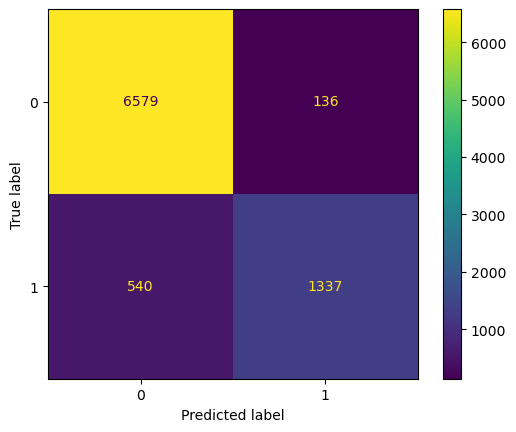

In [71]:
results(best_rf_grid,X_test, y_test)

Overall,RandomForest performs well on the training data, achieving high accuracy and good precision and recall. However, there is a drop in performance when evaluated on the test data, indicating an issue of overfitting

In [72]:
rf2 = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5)
rf2.fit(X_train, y_train)
print("Adjusted RandomForest Classifier: %.3f" % rf2.score(X_test, y_test))

Adjusted RandomForest Classifier: 0.920


# Support Vector Machine (SVM)

In [73]:
svc = Pipeline([('preprocessor', preprocessor), ('SMOTE',SMOTE()), ('classifier', SVC())])
svc.fit(X_train, y_train)
print("SVM score: %.3f" % svc.score(X_test, y_test))

SVM score: 0.851


In [74]:
svc_params = {'classifier__kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
              'classifier__degree':[3,10,15]}

In [75]:
svc_grid = GridSearchCV(svc,svc_params, cv=5)
svc_grid.fit(X_train,y_train)

c:\Users\thech\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\thech\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\thech\anaconda3\lib\site-packages\imblearn\pipeline.py", line 297, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "c:\Users\thech\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 217, in fit
    raise ValueError(
ValueError: Precomputed matrix must be a squ

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['person_age',
                                                                          'person_income',
                                                                          'person_home_ownership',
                                                                          'person_emp_length',
                                                                          'loan_intent',
                                                                          'loan_grade',
                                                                          'loan_amnt',
                                                                          'loan_int_rate',
                                                                          'loan_percent_income',
                                                                          'cb_person_default_on_file',
                                                                          'cb_person_cred_hist_length'])])),
                                       ('SMOTE', SMOTE()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__degree': [3, 10, 15],
                         'classifier__kernel': ['linear', 'poly', 'rbf',
                                                'sigmoid', 'precomputed']})

In [76]:
best_svc_grid = svc_grid.best_estimator_
best_svc_grid.fit(X_train, y_train)
print("SVC Grid score: %.3f" % best_svc_grid.score(X_test, y_test))

SVC Grid score: 0.852


Accuracy Score: 0.8698992317669361
Precision Score: 0.671937550040032
Recall Score: 0.776005547850208
F1 Score: 0.7202317099334906


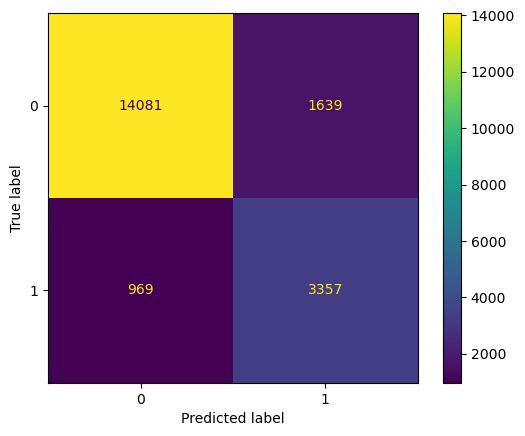

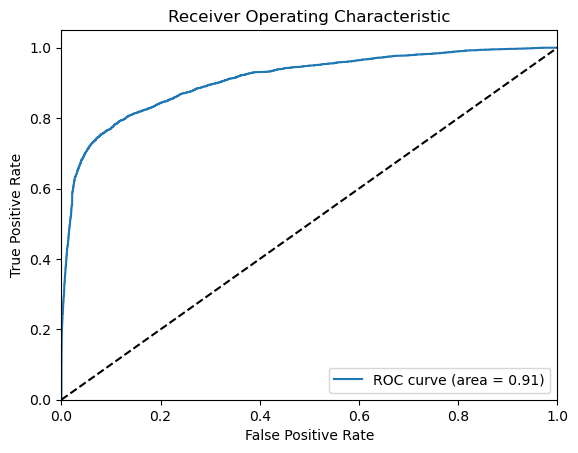

In [77]:
results(best_svc_grid,X_train, y_train) 

Accuracy Score: 0.8524208566108007
Precision Score: 0.6402579456471672
Recall Score: 0.7405434203516249
F1 Score: 0.6867588932806324


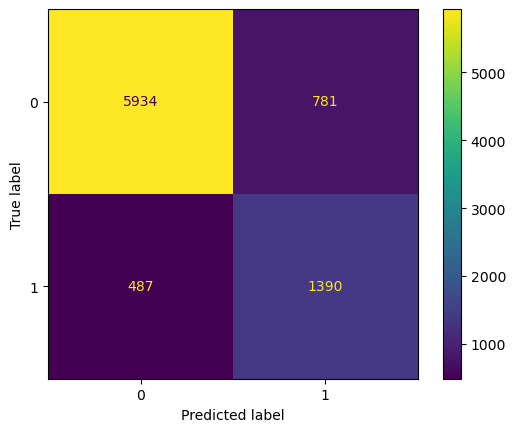

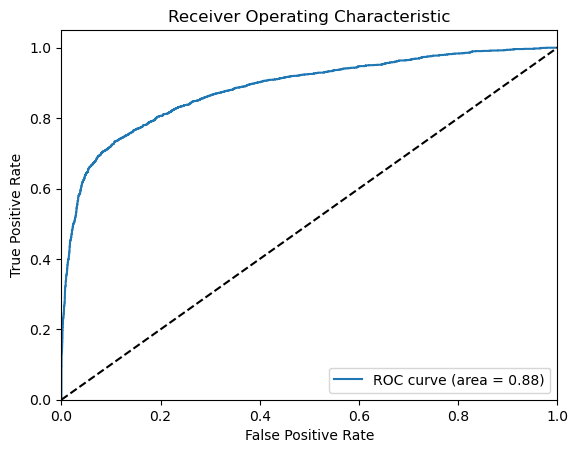

In [78]:
results(best_svc_grid,X_test, y_test)

# eXtreme Gradient Boosting(XGBBClassifier)
* Compared to models already used(Ridge, RandomForest, SVM, etc) XGBoost ideal for capturing complex non-linear relationships between features and targets. XGBoost uses gradient boosting,which combines weak learners(decision trees) additively to improve models performence and can potentially help with overfitting with its regularization techniques including L1 regularization (Lasso) and L2 regularization (Ridge).

In [81]:
XGB = Pipeline([('preprocessor', preprocessor), ('SMOTE', SMOTE()), ('classifier', XGBClassifier())])
XGB.fit(X_train,y_train)
print("XGB Classifier score: %.3f" % XGB.score(X_test, y_test))

XGB Classifier score: 0.934


In [89]:
xgb_params = {
    'classifier__learning_rate':[0.1,0.001,0.01],
    'classifier__n_estimators':[100,150],
    'classifier__max_depth':[10,15],
    'classifier__subsample':[0.9,0.8],
    'classifier__reg_alpha':[0.1]}

In [90]:
xgb_grid = GridSearchCV(XGB,xgb_params, cv=5)
xgb_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['person_age',
                                                                          'person_income',
                                                                          'person_home_ownership',
                                                                          'person_emp_length',
                                                                          'loan_intent',
                                                                          'loan_grade',
                                                                          'loan_amnt',
                                                                          'loan_int_rate',
                                                                          'loan_percent_income',
                                                                          'cb_person_default_on_file',
                                                                          'cb_person_cred_hist_length'])]...
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             param_grid={'classifier__learning_rate': [0.1, 0.001, 0.01],
                         'classifier__max_depth': [10, 15],
                         'classifier__n_estimators': [100, 150],
                         'classifier__reg_alpha': [0.1],
                         'classifier__subsample': [0.9, 0.8]})

In [92]:
best_xgb_grid = xgb_grid.best_estimator_
best_xgb_grid.fit(X_train, y_train)
print("XGB Grid Classifier score: %.3f" % best_xgb_grid.score(X_test, y_test))

XGB Grid Classifier score: 0.933


Accuracy Score: 0.9797465828594233
Precision Score: 0.9984740590030519
Recall Score: 0.907535829865927
F1 Score: 0.9508355534027608


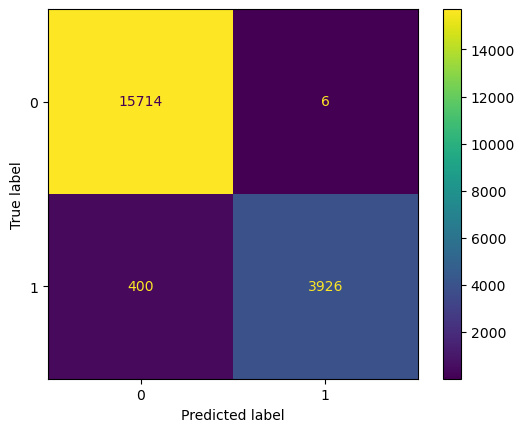

In [93]:
results(best_xgb_grid, X_train, y_train)

Accuracy Score: 0.9333100558659218
Precision Score: 0.9515235457063712
Recall Score: 0.732019179541822
F1 Score: 0.8274616079494129


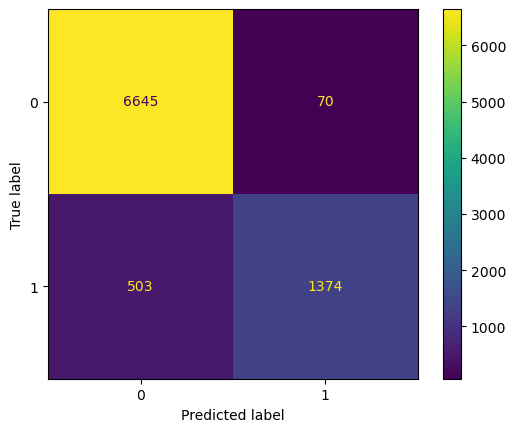

In [94]:
results(best_xgb_grid, X_test, y_test)

# LightGBM Classifier
* Light Gradient Boosting uses a leaf-wise tree growth strategy, as opposed to the level-wise growth strategy used by most gradient boosting algorithms. This approach focuses on growing the tree by expanding the leaf with the highest loss improvement, leading to faster convergence and potentially better accuracy. Compared to above models, it stands out in terms of handling categoricals w/o OHE, customizable loss functions, and quickness.

# Testing Models on Random 

In [79]:
def test_random_row(models, df):
    random_index = random.randint(0, len(df) - 1)
    random_row = df.iloc[random_index]

    features = random_row.drop('loan_status')
    target = random_row['loan_status']

    results = {}
    for model_name, model in models.items():
        score = model.predict_proba([features])[0][target]
        results[model_name] = score

    return results

In [80]:
# 
# models = {
#     'Logistic Regression': logistic_regression_model,
#     'Random Forest': random_forest_model,
#     'SVM': svm_model,
#     # Add more models as needed
# }

# results = test_random_row(models, df)
